# Libraries 

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import i0
from numpy import exp, sin, cos
import seaborn as sns
import matplotlib as mpl
import os
from pathlib import Path
from statsFuncs import mean_confidence_interval
from statsFuncs import compDistributions
import scipy
import random

mpl.rcParams['axes.linewidth'] = 2

# Paths 

In [41]:
fig3_path = os.getcwd()
figures_path = str(Path(fig3_path).parent)
datapath = figures_path + '/data/radiologists/Analysis5_22_2020/'

# Plot params 

In [42]:
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['font.serif'] = 'Myriad Pro'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.labelweight'] = 'medium'

# Subject params 

In [43]:
files = folders = 0

for _, dirnames, filenames in os.walk(datapath):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print("{:,} files, {:,} folders".format(files, folders))
print(str(folders-1) + ' subjects')
nSubjects = folders-1

95 files, 15 folders
14 subjects


In [44]:
subject_names = ['S1', 'S3', 'S4', 'S6', 'S7', 'S8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 'SuperSubject']

# Plot histograms 

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


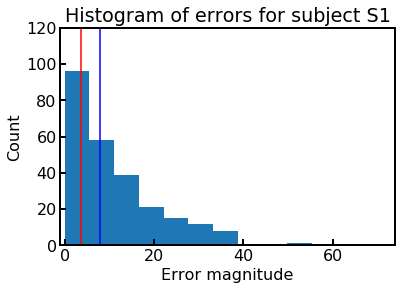

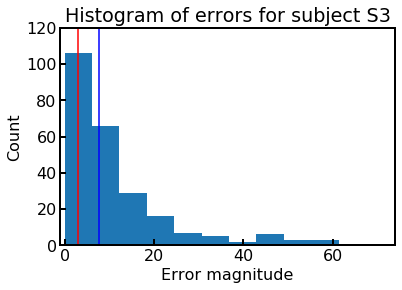

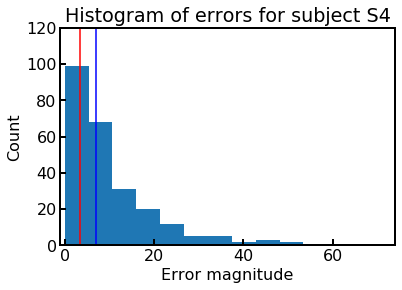

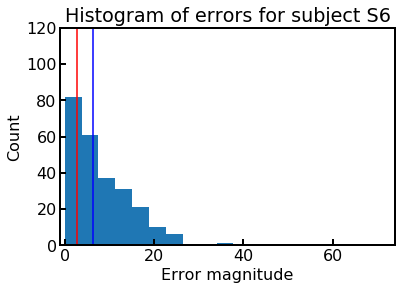

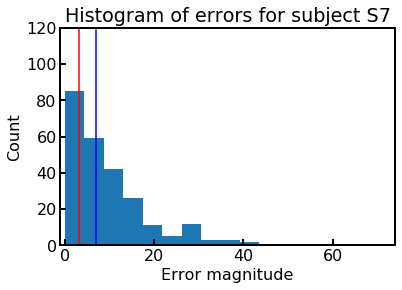

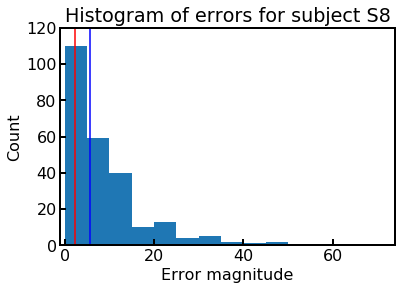

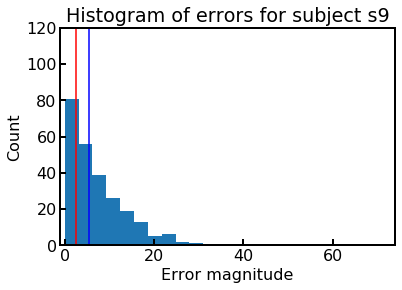

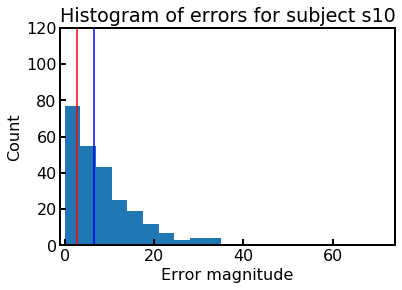

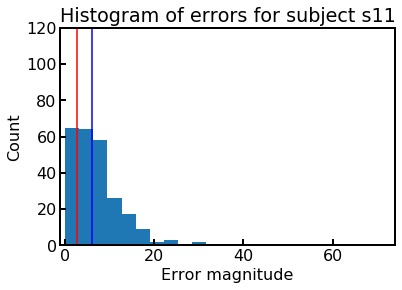

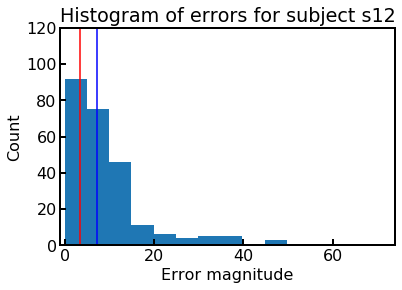

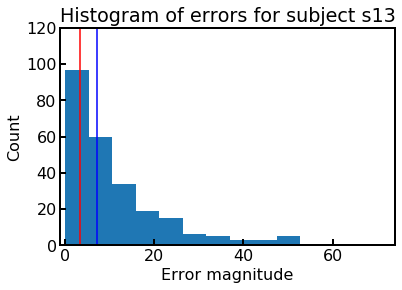

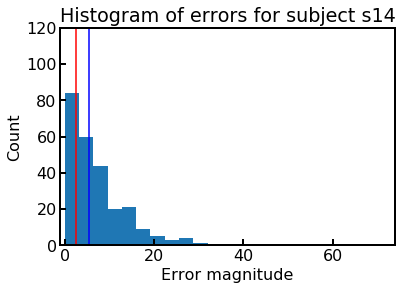

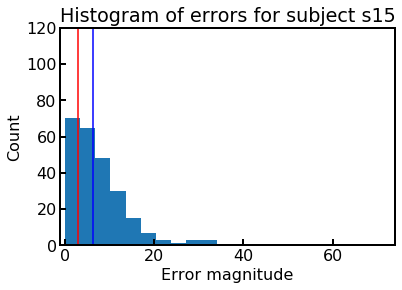

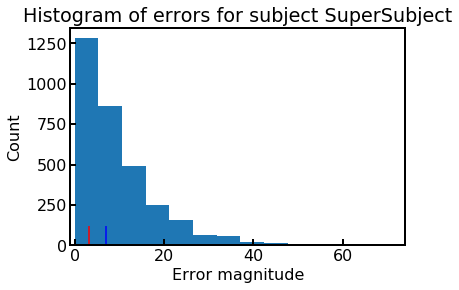

In [46]:
df_percentiles = pd.DataFrame(columns=['SUBJECT','25TH','50TH'])
alldata = pd.DataFrame(columns=['SUBJECT', 'BOOTSTRAP_VALUES'])

row = 0
for subject in subject_names:
    
    # load data:
    subjectdata = pd.read_csv(datapath + subject + '/' + subject + '_VM_output_1nBack.csv')
    df_percentiles.loc[row,'SUBJECT'] = subject
    df_percentiles.loc[row,'25TH'] = np.percentile(np.asarray(abs(subjectdata['responseError']).dropna()), 25)
    df_percentiles.loc[row,'50TH'] = np.percentile(np.asarray(abs(subjectdata['responseError']).dropna()), 50)
    plt.hist(abs(subjectdata['responseError']))
    plt.vlines(df_percentiles.loc[row,'25TH'], 0, 120, color='red')
    plt.vlines(df_percentiles.loc[row,'50TH'], 0, 120, color='blue')
    plt.xlabel('Error magnitude')
    plt.ylabel('Count')
    plt.xlim([-1, 74])
    if subject != 'SuperSubject':
        plt.ylim([0, 120])
    plt.title('Histogram of errors for subject ' + subject)
    plt.show()

    
    row += 1

In [21]:
df_percentiles['DIFFERENCE'] = df_percentiles['50TH'] - df_percentiles['25TH']

In [22]:
df_percentiles

,SUBJECT,25TH,50TH,DIFFERENCE
0,S1,3.6121,7.94182,4.32972
1,S3,2.99413,7.74544,4.75131
2,S4,3.4139,6.94289,3.529
3,S6,2.73709,6.28379,3.5467
4,S7,3.20186,7.03776,3.8359
5,S8,2.35963,5.62428,3.26466
6,s9,2.47338,5.35044,2.87706
7,s10,2.70009,6.51523,3.81513
8,s11,2.8658,6.0798,3.214
9,s12,3.46451,7.14607,3.68156


Text(0.5, 0, 'Subject')

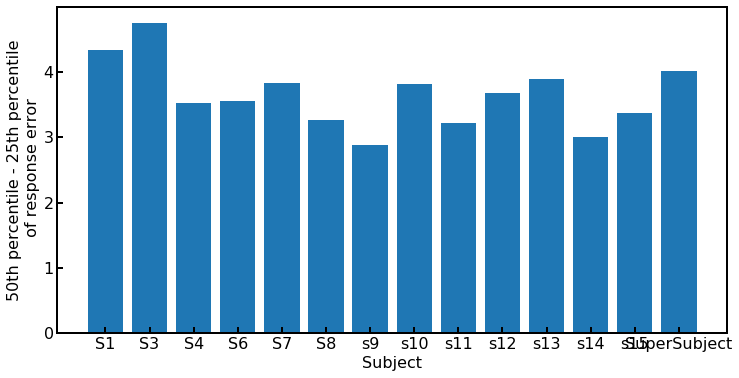

In [28]:
plt.figure(figsize=(12,6))
plt.bar(df_percentiles['SUBJECT'],  df_percentiles['DIFFERENCE'])
plt.ylabel('50th percentile - 25th percentile\n of response error')
plt.xlabel('Subject')